d:\Users\Madhouse\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Creating networks and loading parameters
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
找到人脸数目为：4
[[7.50419769e+02 2.72888601e+02 8.54293224e+02 4.01770605e+02
  9.99998093e-01]
 [4.22467744e+02 2.53335038e+02 5.12085958e+02 3.75575231e+02
  9.99996424e-01]
 [1.23956133e+03 2.40835392e+02 1.34794790e+03 3.80735247e+02
  9.99924064e-01]
 [1.47655432e+02 2.42533580e+02 3.22544999e+02 4.92471701e+02
  9.98600185e-01]]
[750 272 854 401] 0.9999980926513672
(96, 96, 3)


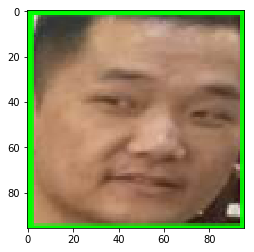

[422 253 512 375] 0.9999964237213135
(96, 96, 3)


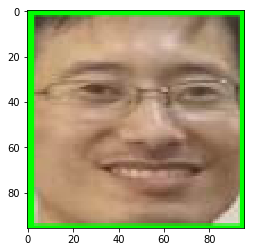

[1239  240 1347  380] 0.9999240636825562
(96, 96, 3)


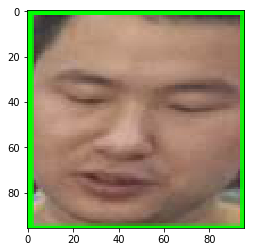

[147 242 322 492] 0.99860018491745
(96, 96, 3)


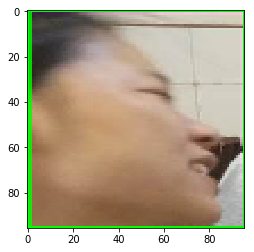

points shape =  (10, 4)
[[ 793.4252   453.0714  1268.5729   273.64713]
 [ 837.64435  493.64032 1318.9712   303.45163]
 [ 815.17096  476.01404 1288.197    315.44553]
 [ 787.6161   451.50974 1264.4036   262.9193 ]
 [ 825.49164  494.07077 1304.977    282.4494 ]
 [ 326.50616  298.2285   295.57407  331.30127]
 [ 333.03168  299.6743   301.6595   341.34784]
 [ 354.4748   324.75375  328.2738   381.02148]
 [ 370.55835  341.3473   347.35922  425.4255 ]
 [ 377.58627  342.3392   353.22772  432.09125]]


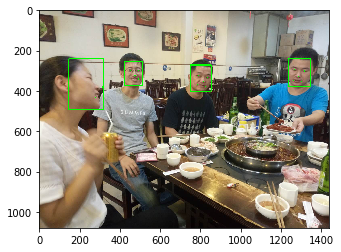

In [1]:
#coding = gbk 
#from scipy import misc
import imageio
import tensorflow as tf  
import numpy as np  
import cv2  
import detect_face  
import time 
import matplotlib.pyplot as plt
%matplotlib inline
  
#face detection parameters  
minsize = 20 # minimum size of face  
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold  
factor = 0.709 # scale factor  
  
def to_rgb(img):  
    w, h = img.shape  
    ret = np.empty((w, h, 3), dtype=np.uint8)  
    ret[:, :, 0] = ret[:, :, 1] = ret[:, :, 2] = img  
    return ret  
  
# restore mtcnn model  
print('Creating networks and loading parameters')  
#gpu_memory_fraction = 1.0  
with tf.Graph().as_default():  
    #gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)  
    #sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
    sess = tf.Session() 
    with sess.as_default():  
        pnet, rnet, onet = detect_face.create_mtcnn(sess, './mtcnn_model/') 
        #pnet, rnet, onet = detect_face.create_mtcnn(sess, './model_check_point/')  
        #pnet, rnet, onet = detect_face.create_mtcnn(sess, None)   
  
#video_capture = cv2.VideoCapture(0)  
#while True:  
#    # Capture frame-by-frame  
#    ret, frame = video_capture.read()  
#  
#    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
#  
#    if gray.ndim == 2:  
#        img = to_rgb(gray)  
#    start = time.time()  
#    bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
#    end = time.time()  
#    print("current frame processing time : %.2fms"%((end-start)*1000))  
#  
#    nrof_faces = bounding_boxes.shape[0]  # number of faces  
#    # print('找到人脸数目为：{}'.format(nrof_faces))  
#  
#    for face_position in bounding_boxes:  
#        face_position = face_position.astype(int)  
#  
#        cv2.rectangle(frame,  
#                      (face_position[0], face_position[1]),  
#                      (face_position[2], face_position[3]),  
#                      (0, 255, 0), 2)  
#    # print(faces)  
#    cv2.imshow('MTCNN Demo', frame)  
#    if cv2.waitKey(30) & 0xFF == ord('q'):  
#        break  
#  
#video_capture.release()  
#cv2.destroyAllWindows()

image_path = 'C:/Users/Madhouse/1.jpg'              

img = imageio.imread(image_path)
#img = misc.imread(image_path)  
#img = cv2.imread(image_path) 
bounding_boxes, points = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
nrof_faces = bounding_boxes.shape[0]#人脸数目  
print('找到人脸数目为：{}'.format(nrof_faces))  
     
print(bounding_boxes)

  
crop_faces=[]  
for face_position in bounding_boxes:
    score = face_position[4]
    face_position=face_position.astype(int)  
    print(face_position[0:4], score)  
    cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 4)  
    crop=img[face_position[1]:face_position[3],  
             face_position[0]:face_position[2],]  
      
    crop = cv2.resize(crop, (96, 96), interpolation=cv2.INTER_CUBIC )  
    print(crop.shape)  
    crop_faces.append(crop)  
    plt.imshow(crop)  
    plt.show()  
    #cv2.imshow("lala",crop)

print("points shape = ",points.shape)
print(points)
points = np.transpose(points)

for p in points:
    for i in range(5):
        cv2.circle(img, (p[i], p[i + 5]), 1, (0, 255, 0), 4)

plt.imshow(img)  
plt.show()

找到人脸数目为：1
[  22  332  567 1011] 1.0


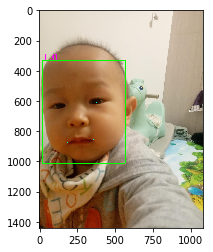

找到人脸数目为：1
[ 70  36 110  89] 1.0


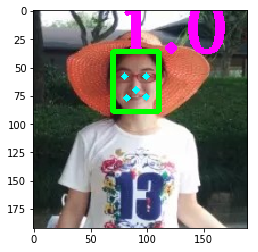

找到人脸数目为：1
[ 84  85 196 229] 1.0


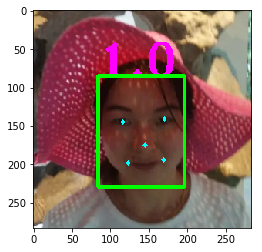

找到人脸数目为：1
[50 43 93 97] 1.0


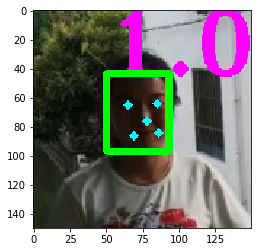

找到人脸数目为：1
[42 28 71 66] 1.0


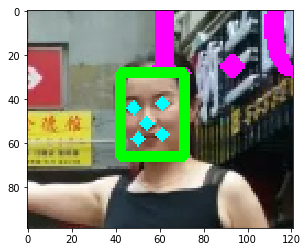

找到人脸数目为：1
[ 59  53 123 134] 1.0


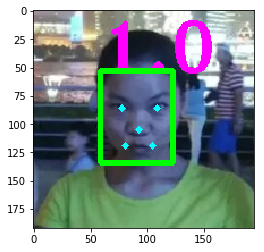

找到人脸数目为：1
[ 90  41 173 147] 1.0


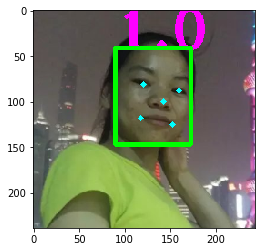

找到人脸数目为：1
[ 73  70 129 145] 1.0


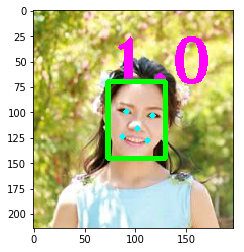

找到人脸数目为：1
[ 66  63 313 333] 1.0


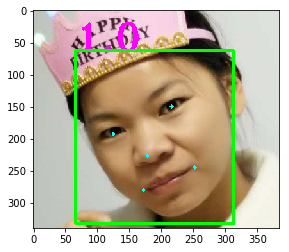

找到人脸数目为：1
[ 59  52 150 181] 1.0


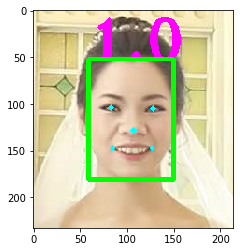

找到人脸数目为：1
[ 71  51 122 116] 1.0


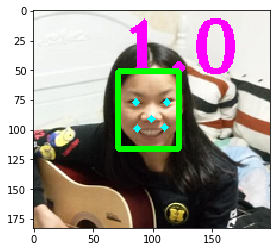

找到人脸数目为：1
[ 68  47 127 131] 1.0


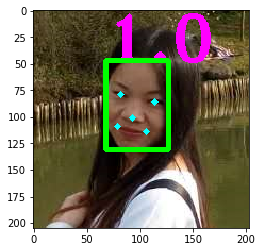

找到人脸数目为：1
[28 33 71 85] 1.0


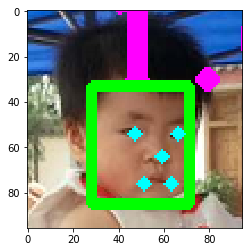

找到人脸数目为：4
[154  44 189  80] 1.0
[42 26 72 65] 1.0
[ 81  42 103  72] 1.0
[127  47 152  79] 1.0


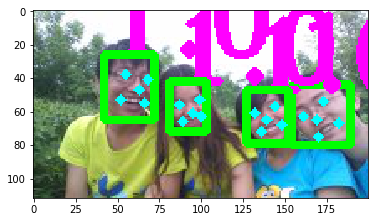

找到人脸数目为：1
[163 163 186 192] 1.0


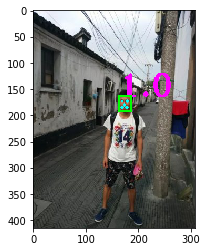

找到人脸数目为：2
[135  61 158  90] 1.0
[254  54 279  86] 0.97


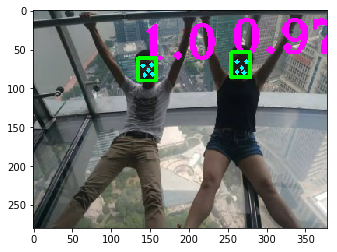

找到人脸数目为：2
[447 230 462 250] 1.0
[478 206 495 225] 1.0


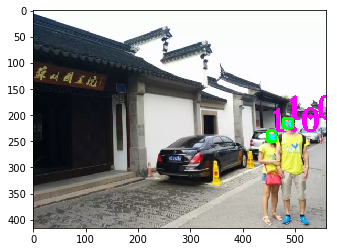

找到人脸数目为：2
[266 102 290 132] 1.0
[232  91 254 119] 1.0


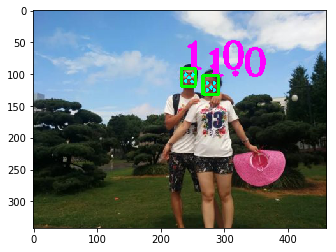

找到人脸数目为：1
[ 95 108 106 121] 0.98


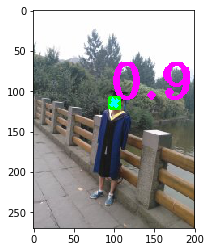

找到人脸数目为：2
[270 438 300 473] 1.0
[336 469 366 505] 1.0


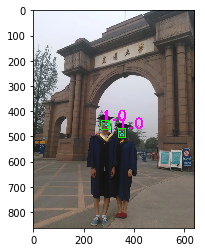

找到人脸数目为：1
[181 164 199 185] 1.0


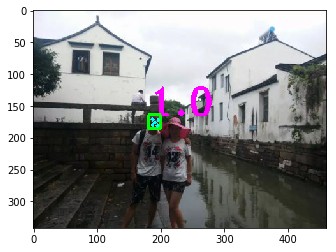

找到人脸数目为：1
[113  92 124 105] 1.0


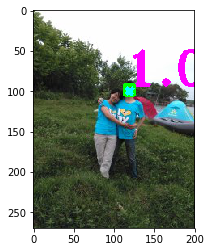

找到人脸数目为：1
[110 105 123 122] 1.0


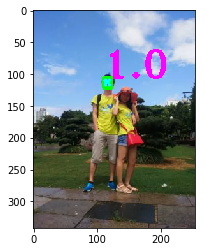

找到人脸数目为：2
[125  95 139 113] 1.0
[ 91 110 104 125] 0.89


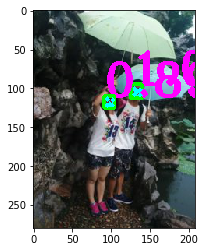

找到人脸数目为：4
[396 371 419 399] 1.0
[333 376 357 404] 1.0
[ 93 433 105 446] 1.0
[117 370 128 385] 0.94


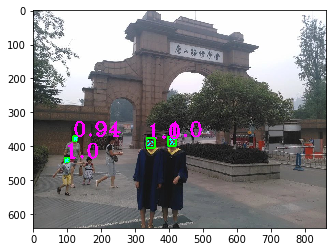

找到人脸数目为：1
[105  99 118 115] 1.0


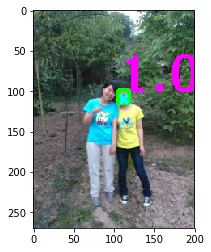

找到人脸数目为：2
[320 270 358 314] 1.0
[252 278 287 321] 1.0


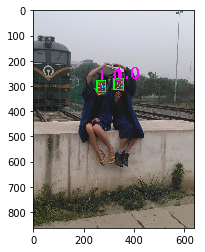

找到人脸数目为：3
[ 65  86  79 103] 1.0
[135  92 159 122] 1.0
[174  63 188  81] 0.98


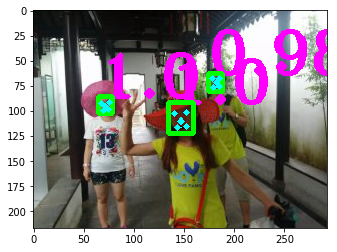

找到人脸数目为：2
[259 227 290 265] 1.0
[577 263 610 306] 1.0


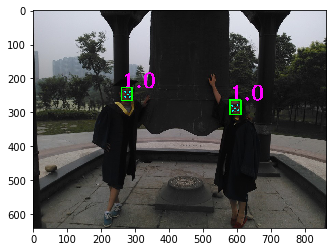

找到人脸数目为：0


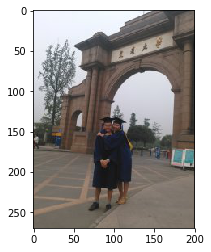

找到人脸数目为：2
[ 68  31 109  80] 1.0
[100  81 134 124] 1.0


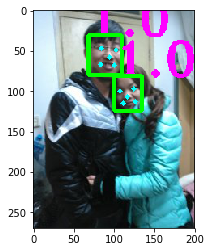

找到人脸数目为：1
[251 148 275 182] 1.0


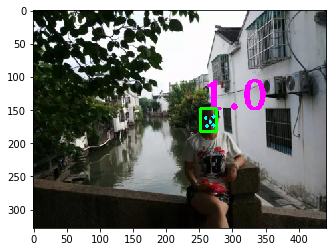

找到人脸数目为：2
[395 295 420 325] 1.0
[188 307 211 336] 0.99


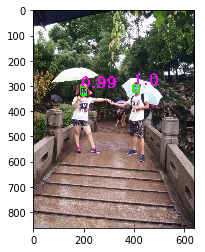

找到人脸数目为：2
[ 95  14 143  78] 1.0
[169 132 189 155] 0.97


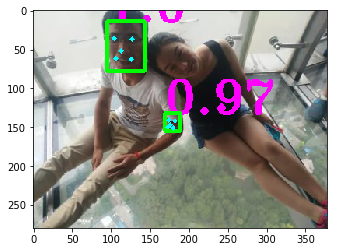

找到人脸数目为：1
[427 155 445 178] 1.0


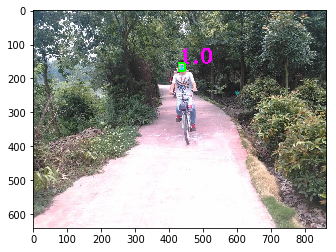

找到人脸数目为：1
[493 221 514 248] 1.0


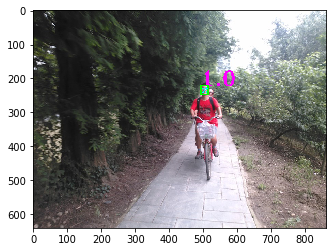

找到人脸数目为：2
[315 400 340 431] 1.0
[259 431 283 459] 1.0


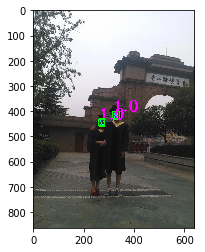

找到人脸数目为：1
[104  81 117  96] 1.0


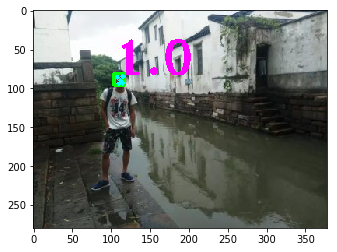

找到人脸数目为：0


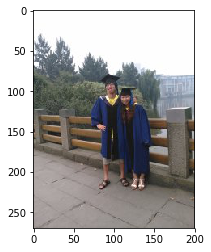

找到人脸数目为：2
[ 63  30 105  83] 1.0
[ 91  86 126 130] 1.0


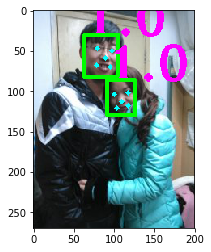

找到人脸数目为：1
[ 64  33 106  87] 1.0


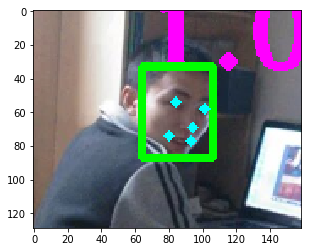

找到人脸数目为：1
[ 67  48 138 140] 1.0


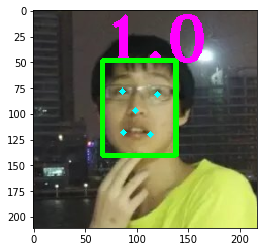

找到人脸数目为：1
[ 75  47 145 142] 1.0


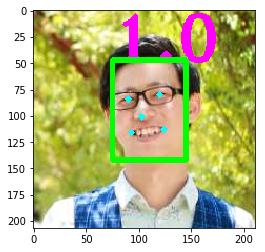

找到人脸数目为：1
[ 58  36 149 159] 1.0


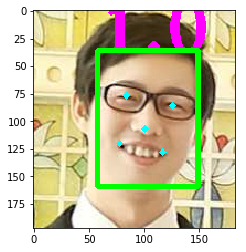

找到人脸数目为：1
[ 42  36 166 192] 1.0


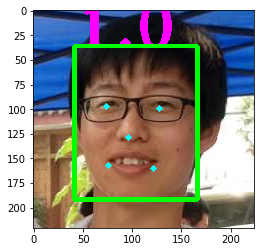

找到人脸数目为：1
[121 305 629 977] 1.0


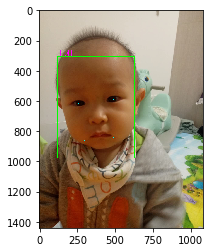

找到人脸数目为：1
[552 329 859 700] 1.0


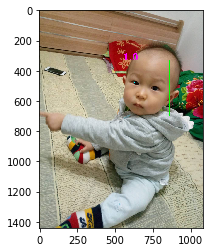

找到人脸数目为：1
[ 97 370 628 993] 1.0


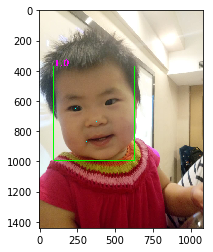

找到人脸数目为：1
[ 164  222  845 1118] 1.0


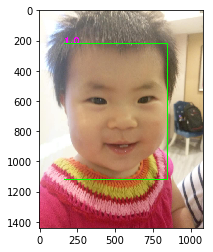

找到人脸数目为：2
[434 440 544 572] 1.0
[657 373 806 588] 0.98


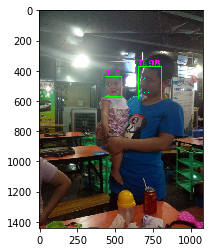

找到人脸数目为：4
[382 254 469 368] 1.0
[724 274 826 401] 1.0
[117 286 319 588] 1.0
[1201  228 1310  371] 1.0


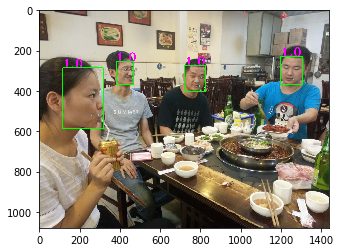

找到人脸数目为：4
[750 272 854 401] 1.0
[422 253 512 375] 1.0
[1239  240 1347  380] 1.0
[147 242 322 492] 1.0


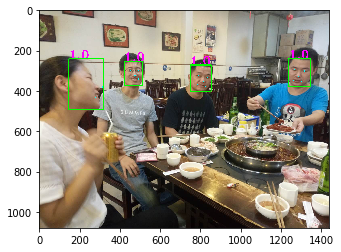

找到人脸数目为：7
[193 282 283 392] 1.0
[511 286 601 398] 1.0
[577 221 618 277] 1.0
[906 276 988 379] 1.0
[725 222 770 280] 1.0
[1266  340 1361  441] 1.0
[1185  328 1211  363] 0.76


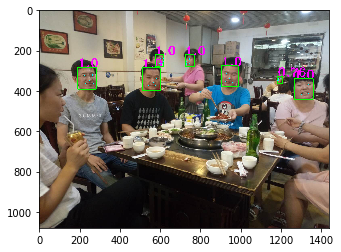

找到人脸数目为：3
[700 395 788 522] 1.0
[591 442 660 531] 1.0
[262 545 307 600] 1.0


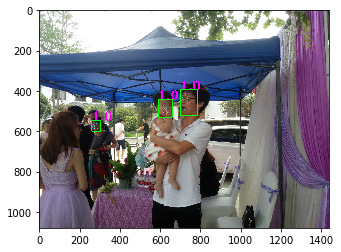

找到人脸数目为：2
[829 574 952 744] 1.0
[617 398 749 568] 1.0


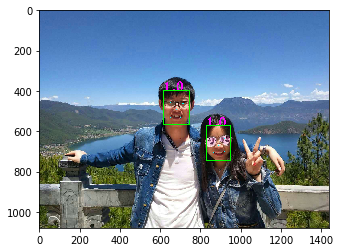

找到人脸数目为：2
[ 273  860  578 1226] 1.0
[507 563 834 987] 1.0


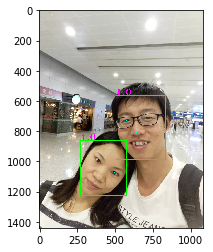

找到人脸数目为：2
[556 843 600 901] 1.0
[506 779 552 833] 1.0


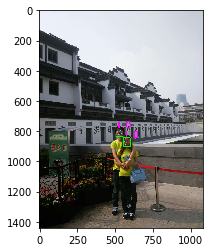

In [31]:
import os 
import imageio
import cv2
from PIL import Image
from os.path import join, exists
#path = "C:/Users/Madhouse/" #文件夹目录
svpath = "D:/software/photos"
dstdir= svpath + '/' + "saving2"
if not exists(dstdir): os.mkdir(dstdir)

#for i in range(len(crop_faces)):
#    #cv2.imwrite(join(dstdir,"%d.jpg" %(i)), crop_faces[i])
#    #imageio.imwrite(r'G:\leopard_i1.jpg',img)  
#    #imageio.imwrite(r'G:\leopard_i2.jpg',np.float32(img/10)) # automatic brightness adjust  
#    #imageio.imwrite(r'G:\leopard_i3.jpg',np.uint8(img/10))
#    imageio.imwrite(join(dstdir,"%d.jpg" %(i)), crop_faces[i])
#print("end")

#path = "C:/Users/Madhouse/" #文件夹目录
path = "D:/software/photos"
files= os.listdir(path) #得到文件夹下的所有文件名称
cnt=0
for file in files: #遍历文件夹 
    if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开
        #print(file)
        if(file.find(".jpg") > 0):
            #img = imageio.imread(path+'/'+file)
            #print(img.shape)
            img = Image.open(path+'/'+file)
            #print(img.mode)
            if(img.mode=='RGBA'):
                img=img.convert('RGB')
            #plt.imshow(img)
            #plt.show()
            #img = np.array(img,dtype=np.float32)
            img = np.array(img)
            #img = cv2.imread(path+'/'+file)
            bounding_boxes, points = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
            nrof_faces = bounding_boxes.shape[0]#人脸数目  
            print('找到人脸数目为：{}'.format(nrof_faces))
            
            for face_position in bounding_boxes:
                score = np.round(face_position[4],2)
                face_position=face_position.astype(int)  
                print(face_position[0:4], score) 
                crop=img[face_position[1]:face_position[3],  
                     face_position[0]:face_position[2],]
                crop = cv2.resize(crop, (96, 96), interpolation=cv2.INTER_CUBIC)  
                #print(crop.shape)  
                imageio.imwrite(join(dstdir,"%d.jpg" %(cnt)), crop)
                cnt+=1
                cv2.putText(img,str(score),(face_position[0],face_position[1]),cv2.FONT_HERSHEY_TRIPLEX,2,(255,0,255),3)
                cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 4)
            points = np.transpose(points)
            for point in points:  
                for i in range(5):
                    cv2.circle(img, (point[i], point[i + 5]), 1, (0, 255, 255), 4)
                
            plt.imshow(img)  
            plt.show()

In [7]:
#coding = gbk 
#from scipy import misc
import imageio
import tensorflow as tf  
import numpy as np  
import cv2  
import detect_face  
import time 
import matplotlib.pyplot as plt
%matplotlib inline
  
#face detection parameters  
minsize = 20 # minimum size of face  
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold  
factor = 0.709 # scale factor  
  
def to_rgb(img):  
    w, h = img.shape  
    ret = np.empty((w, h, 3), dtype=np.uint8)  
    ret[:, :, 0] = ret[:, :, 1] = ret[:, :, 2] = img  
    return ret  
  
# restore mtcnn model  
print('Creating networks and loading parameters')  
with tf.Graph().as_default():  
    sess = tf.Session() 
    with sess.as_default():  
        pnet, rnet, onet = detect_face.create_mtcnn(sess, './mtcnn_model/') 
  
#video_capture = cv2.VideoCapture("./video.avi") 
video_capture = cv2.VideoCapture("./4.mp4") 
while True:  
    # Capture frame-by-frame  
    ret, frame = video_capture.read()  
  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
  
    if gray.ndim == 2:  
        img = to_rgb(gray)  
    start = time.time()  
    bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)  
    end = time.time()  
    print("current frame processing time : %.2fms"%((end-start)*1000))  
  
    nrof_faces = bounding_boxes.shape[0]  # number of faces  
    print('找到人脸数目为：{}'.format(nrof_faces))  
  
    for face_position in bounding_boxes:  
        face_position = face_position.astype(int)  
  
        cv2.rectangle(frame,  
                      (face_position[0], face_position[1]),  
                      (face_position[2], face_position[3]),  
                      (0, 255, 0), 2)  
    # print(faces)  
    cv2.imshow('MTCNN Demo', frame)  
    if cv2.waitKey(30) & 0xFF == ord('q'):  
        break  
  
video_capture.release()  
cv2.destroyAllWindows()

#crop_faces=[]  
#for face_position in bounding_boxes:
#    score = face_position[4]
#    face_position=face_position.astype(int)  
#    print(face_position[0:4], score)  
#    cv2.rectangle(img, (face_position[0], face_position[1]), (face_position[2], face_position[3]), (0, 255, 0), 4)  
#    crop=img[face_position[1]:face_position[3],  
#             face_position[0]:face_position[2],]  
#      
#    crop = cv2.resize(crop, (96, 96), interpolation=cv2.INTER_CUBIC )  
#    print(crop.shape)  
#    crop_faces.append(crop)  
#    plt.imshow(crop)  
#    plt.show()  
#    #cv2.imshow("lala",crop)
#
#print("points shape = ",points.shape)
#print(points)
#points = np.transpose(points)
#
#for p in points:
#    for i in range(5):
#        cv2.circle(img, (p[i], p[i + 5]), 1, (0, 255, 0), 4)
#
#plt.imshow(img)  
#plt.show()

Creating networks and loading parameters
current frame processing time : 328.12ms
找到人脸数目为：2
current frame processing time : 345.08ms
找到人脸数目为：2
current frame processing time : 310.17ms
找到人脸数目为：2
current frame processing time : 352.54ms
找到人脸数目为：2
current frame processing time : 340.09ms
找到人脸数目为：2
current frame processing time : 328.12ms
找到人脸数目为：0
current frame processing time : 325.63ms
找到人脸数目为：1
current frame processing time : 349.89ms
找到人脸数目为：3
current frame processing time : 315.67ms
找到人脸数目为：1
current frame processing time : 332.11ms
找到人脸数目为：3
current frame processing time : 360.54ms
找到人脸数目为：1
current frame processing time : 331.12ms
找到人脸数目为：2
current frame processing time : 329.63ms
找到人脸数目为：2
current frame processing time : 332.62ms
找到人脸数目为：2
current frame processing time : 335.09ms
找到人脸数目为：3
current frame processing time : 345.08ms
找到人脸数目为：3
current frame processing time : 321.54ms
找到人脸数目为：3
current frame processing time : 343.08ms
找到人脸数目为：2
current frame processing time : 337.10ms


current frame processing time : 341.09ms
找到人脸数目为：3
current frame processing time : 334.11ms
找到人脸数目为：3
current frame processing time : 324.61ms
找到人脸数目为：3
current frame processing time : 338.60ms
找到人脸数目为：2
current frame processing time : 316.16ms
找到人脸数目为：2
current frame processing time : 321.14ms
找到人脸数目为：2
current frame processing time : 314.67ms
找到人脸数目为：2
current frame processing time : 290.73ms
找到人脸数目为：2
current frame processing time : 296.21ms
找到人脸数目为：2
current frame processing time : 287.23ms
找到人脸数目为：2
current frame processing time : 319.15ms
找到人脸数目为：2
current frame processing time : 321.66ms
找到人脸数目为：2
current frame processing time : 318.15ms
找到人脸数目为：2
current frame processing time : 286.24ms
找到人脸数目为：2
current frame processing time : 293.23ms
找到人脸数目为：2
current frame processing time : 312.17ms
找到人脸数目为：2
current frame processing time : 324.15ms
找到人脸数目为：2
current frame processing time : 319.15ms
找到人脸数目为：2
current frame processing time : 322.14ms
找到人脸数目为：2
current frame processing time :

error: OpenCV(3.4.1) D:\Build\OpenCV\opencv-3.4.1\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor
